In [1]:
import numpy as np
import pandas as pd

In [2]:
nSamples = 3175
sequenceLength = 15

In [3]:
filename = "ISSN_M_tot.csv"

In [4]:
# plot complete data in a graph
df = pd.read_csv(filename, sep=",", header=None).dropna()

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = df[3].values[:nSamples - sequenceLength].astype(np.float32)

Text(0, 0.5, 'Sunspot')

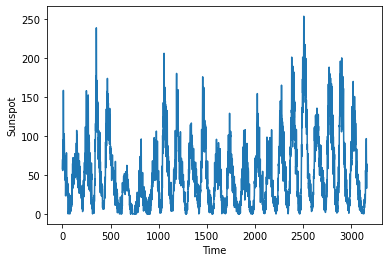

In [7]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Sunspot")

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mmScaler = MinMaxScaler((-1, 1))
data = mmScaler.fit_transform(data.reshape(-1, 1))

In [10]:
Xts = np.zeros(shape=(nSamples - sequenceLength, sequenceLength, 1), dtype=np.float32)
yts = np.zeros(shape=(nSamples - sequenceLength, 1), dtype=np.float32)

In [11]:
for i in range(0, data.shape[0] - sequenceLength):
    Xts[i] = data[i:i + sequenceLength]
    yts[i] = data[i + sequenceLength]

In [12]:
XtsTrain = Xts[:int(Xts.shape[0] * 0.8)]
ytsTrain = yts[:int(yts.shape[0] * 0.8)]

XtsTest = Xts[int(Xts.shape[0] * 0.8):]
ytsTest = yts[int(yts.shape[0] * 0.8):]

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(sequenceLength, 1)),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(1),
    ]
)

In [15]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [16]:
model.fit(XtsTrain, ytsTrain, epochs=100, batch_size=32, validation_data=(XtsTest, ytsTest))

Epoch 1/100
79/79 [==============================] - 3s 14ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 8/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0173 - 

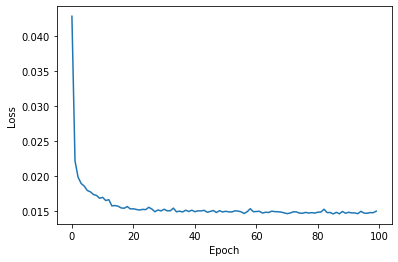

In [17]:
# plot the training results in a graph
plt.plot(model.history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

20/20 [==============================] - 1s 4ms/step


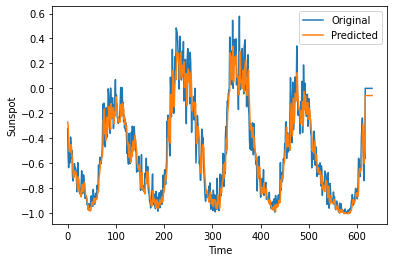

In [18]:
predictions = model.predict(XtsTest)

# plot the predictions in a graph
plt.plot(ytsTest, label="Original")

plt.plot(predictions, label="Predicted")

plt.xlabel("Time")

plt.ylabel("Sunspot")

plt.legend()

plt.show()